In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from scipy.stats import ttest_ind
import xgboost as xgb

In [3]:
workdir = "D://miR_Rank_Feautre_selection//Raw_data"

In [4]:
sns.set(style="white")

In [5]:
df_e1 = pd.read_csv(workdir + "//200617_95_samples_miRNA_HC_vs_T2DM_RPM.csv"
                    , index_col = ["id"])
Y_T2D = df_e1["Class"] #Class
#X_DN = df_e1.drop(["Class", 'hsa-let-7b-5p', 'hsa-miR-23b-3p', 'hsa-let-7c-5p', 'hsa-miR-30a-3p', 'hsa-miR-200c-3p'], axis = 1) #Rest dataseet
#X_DN = df_e1.drop(["Class", 'hsa-miR-1290'], axis = 1) #Rest dataseet
#X_DN = df_e1.drop(["Class", 'hsa-miR-642a-5p', 'hsa-miR-1343-3p', 'hsa-miR-642a-3p', 'hsa-miR-99b-3p', 'hsa-miR-671-3p', 'hsa-miR-3144-5p', 'hsa-miR-320c', 'hsa-miR-150-5p'], axis = 1) #Rest dataseet
#X_DN = df_e1.drop(["Class", 'hsa-miR-642a-5p', 'hsa-miR-642a-3p', 'hsa-miR-99b-3p', 'hsa-miR-891a-5p', 'hsa-miR-320c', 'hsa-miR-150-5p'], axis = 1) #Rest dataseet
X_T2D = df_e1.drop(["Class"], axis = 1) #Rest dataseet
# split data train 70 % and test 30 %
# split data train 70 % and test 30 %
#drop and rotate dataset
X_T2D = X_T2D.T[(X_T2D != 0).any()].T

_number_of_samples = len(X_T2D)
_number_of_items = len(X_T2D.columns.to_list())


In [6]:
len(X_T2D)

95

In [7]:
# 각 miRNA에 대해 각 샘플들에서 가지고 있는 0의 총 비율이 0.9 이상이면 해당 miRNA 제거
for x in X_T2D.columns:
    try:
        num_zero = X_T2D[x].value_counts(0)[0]
        if num_zero / _number_of_samples > 0.9:
            X_T2D = X_T2D.drop([x], axis = 1)
    except KeyError:
        continue

In [8]:
# z-normalization
X_T2D = (X_T2D - X_T2D.mean())/X_T2D.std()

In [9]:
X_T2D

,hsa-let-7a-3p,hsa-let-7a-5p,hsa-let-7b-3p,hsa-let-7b-5p,hsa-let-7c-5p,hsa-let-7d-3p,hsa-let-7d-5p,hsa-let-7e-3p,hsa-let-7e-5p,hsa-let-7f-1-3p,...,hsa-miR-95-3p,hsa-miR-95-5p,hsa-miR-9-5p,hsa-miR-96-5p,hsa-miR-98-3p,hsa-miR-98-5p,hsa-miR-99a-3p,hsa-miR-99a-5p,hsa-miR-99b-3p,hsa-miR-99b-5p
id,,,,,,,,,,,,,,,,,,,,,
SRR5034616,-0.972999,-1.590240,-0.710602,-1.668209,-1.497317,1.170055,-1.031390,-0.137931,-1.168583,-1.410621,...,-1.160351,0.327174,-1.113343,0.151506,1.374364,-1.361685,-0.148347,-0.718263,-0.421982,-0.804055
SRR5034617,-1.288310,-1.441082,-1.302135,-0.593264,-1.326951,0.243565,-0.841558,-0.256088,-1.151125,-1.342868,...,-1.160176,-0.679285,-1.087991,4.216716,-0.003670,-1.305469,-0.537258,-0.887539,-0.777453,-0.933970
SRR5034618,-0.217445,-0.695676,-0.272238,1.210303,2.183240,2.940800,1.919994,4.763839,2.353511,-1.041261,...,-1.133289,-0.699102,-1.064693,0.495846,4.056442,-0.969239,0.333605,-0.859287,2.915960,-0.245828
SRR5034619,-0.623344,-1.477429,-0.146208,-1.488470,-1.337813,1.409313,-0.493901,0.230624,-0.954059,-1.097628,...,-0.957682,-0.699102,-1.026619,0.229754,2.023614,-1.318627,-0.342462,-0.679214,-0.634527,-0.864437
SRR5034620,-1.281504,-1.652755,-0.890091,-2.004037,-1.659201,0.533103,-1.618289,-0.264466,-1.272967,-1.450055,...,-1.181940,-0.699102,-1.104137,0.100825,0.301271,-1.412548,-0.269654,-0.844888,-0.929399,-1.009091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SRR7412331,0.409598,0.095435,0.120977,0.229192,0.298654,-0.448166,0.212918,0.438660,0.634620,-0.615226,...,-0.224727,1.273577,1.770814,-0.932304,-0.134323,0.317909,-0.608314,-0.895670,1.756399,-0.931825
SRR7412332,0.119585,0.598026,-0.576227,-0.034018,0.467438,-0.692268,-0.444617,-0.763184,-0.104429,0.338593,...,-0.768453,-0.699102,-0.344905,-0.932304,-0.900141,0.084580,0.569506,-0.477124,-0.452426,-0.838348
SRR7412333,0.248616,0.655524,-0.544850,0.134195,0.404082,-0.490331,0.220134,-0.763184,0.091931,0.781169,...,0.082054,1.244490,-0.083252,-0.872810,-0.561146,0.259742,-0.608314,-0.221811,-0.100034,0.356620


In [10]:
# 20200619 - Feature selection - using 

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif
from sklearn.metrics import classification_report

# calculation of p-value from each features
import statsmodels.api as sm

# ROC analysis
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold
from scipy import interp

_num_of_features = 3

#df_e1 = pd.read_csv("./Dataset_trimmed_106_prc.txt", sep="\t", index_col=0)



x_train, x_test, y_train, y_test = train_test_split(X_T2D, Y_T2D, test_size=0.3, random_state=42)

# find best scored features
select_feature = SelectKBest(f_classif, k=_num_of_features).fit(x_train, y_train)
#print('Score list:', select_feature.scores_)
#print('Feature list:', x_train.columns)

x_train_2 = select_feature.transform(x_train)
x_test_2 = select_feature.transform(x_test)
feature_sel_X_T2D = select_feature.transform(X_T2D)

Accuracy is:  0.6896551724137931
              precision    recall  f1-score   support

           0       0.77      0.62      0.69        16
           1       0.62      0.77      0.69        13

    accuracy                           0.69        29
   macro avg       0.70      0.70      0.69        29
weighted avg       0.70      0.69      0.69        29

['hsa-miR-1307-3p', 'hsa-miR-6820-5p', 'hsa-miR-29b-2-5p']
Feature ranking:
1. feature 0 (0.408011)
2. feature 1 (0.392608)
3. feature 2 (0.199380)
Number of wrong prediction: 9
0.6971153846153847


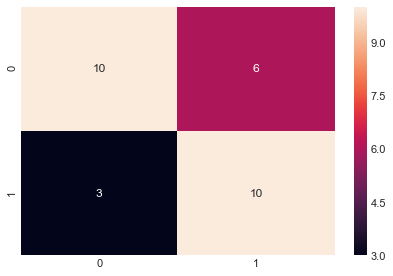

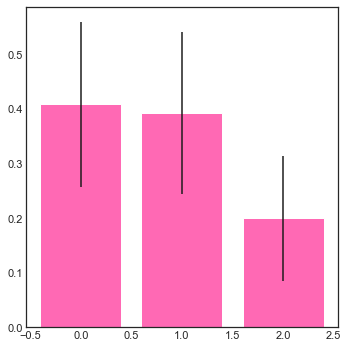

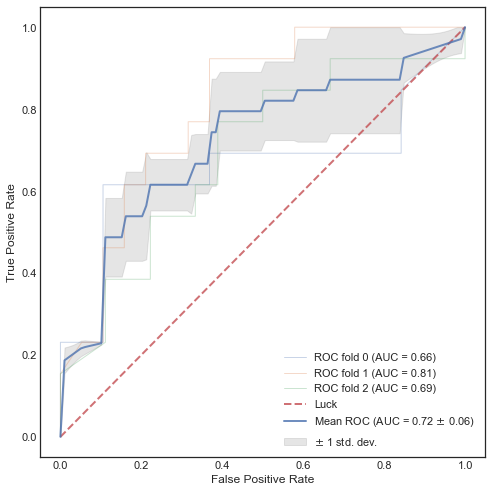

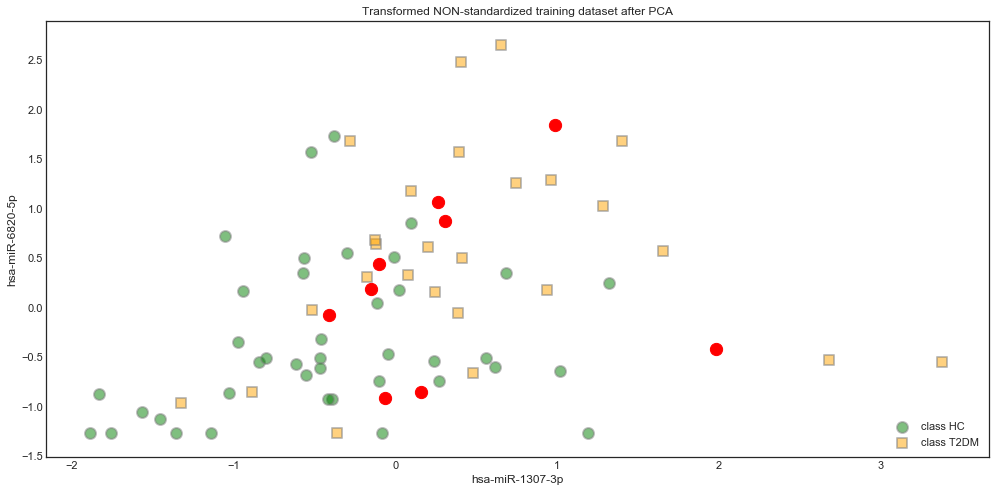

In [36]:

#random forest classifier with n_estimators=10 (default)
clf_rf_2 = RandomForestClassifier() # removed on 20190220
clr_rf_2 = clf_rf_2.fit(x_train_2, y_train) # removed on 20190220

y_pred = clf_rf_2.predict(x_test_2) # removed on 20190220


ac_2 = accuracy_score(y_test, y_pred)
print('Accuracy is: ', ac_2)
print (classification_report(y_test, y_pred))
cm_2 = confusion_matrix(y_test,y_pred)

sns.heatmap(cm_2,annot=True,fmt="d")

lst = x_train.columns[sorted(range(len(select_feature.scores_)), key=lambda i: select_feature.scores_[i])[-1 * _num_of_features:][::-1]].tolist()

print(lst)


importances = clr_rf_2.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf_rf_2.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1][:_num_of_features]

# Print the feature ranking
print("Feature ranking:")

#for f in range(x_train.shape[1]):
for f in range(_num_of_features):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest

fig1, ax1 = plt.subplots(figsize=(5, 5))


#fig1.title("Feature importances")
#plt.bar(range(x_train.shape[1]), importances[indices],
ax1.bar(range(_num_of_features), importances[indices],
        color="hotpink", yerr=std[indices], align="center")
#plt.xticks(range(x_train.shape[1]), x_train.columns[indices],rotation=90)
#ax1.xticks(range(_num_of_features), x_train.columns[indices],rotation=90)
#plt.xlim([-1, x_train.shape[1]])
#ax1.xlim([-1, _num_of_features])
fig1.show()


# Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(n_splits=3)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig3, ax3 = plt.subplots(figsize=(7, 7))    

i = 0
for train, test in cv.split(feature_sel_X_T2D, Y_T2D):
    probas_ = clf_rf_2.fit(feature_sel_X_T2D[train],Y_T2D.values[train]).predict_proba(feature_sel_X_T2D[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(Y_T2D.values[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    ax3.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    i += 1




ax3.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Luck', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)

ax3.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax3.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

ax3.set_xlim([-0.05, 1.05])
ax3.set_ylim([-0.05, 1.05])
ax3.set_xlabel('False Positive Rate')
ax3.set_ylabel('True Positive Rate')
#plt.title('Receiver operating characteristic example')
ax3.legend(loc="lower right")
ax3.grid(False)
fig3.show()
fig3.savefig(workdir + "//ANOVA_F_RF_auc.png", dpi=300)

fig4, ax4 = plt.subplots(figsize=(14, 7)) 

for l,c,m,lab in zip(range(0,2), ('green', 'orange'), ('o', 's'), ("HC", "T2DM")): 
    # Plot th prediction results from test set
    ax4.scatter(x_train_2[y_train==l, 0], x_train_2[y_train==l, 1], color=c, label="class %s" % lab, alpha=0.5,
                marker=m, s=120, edgecolor="gray", linewidth=2)

# Circle out the incorrect predictions
X_wrong = x_test_2[y_pred != y_test,:]
ax4.scatter(X_wrong[:,0], X_wrong[:,1], s=150, facecolors='red', zorder=10)

ax4.set_title('Transformed NON-standardized training dataset after PCA')    

ax4.set_xlabel(lst[0])
ax4.set_ylabel(lst[1])
ax4.legend(loc='lower right')
ax4.grid(False)
fig4.tight_layout()
fig4.show()


print("Number of wrong prediction: %s" % X_wrong.shape[0])
from sklearn.metrics import roc_curve, auc, roc_auc_score
print (roc_auc_score(y_test, y_pred))